In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Helper Function: Improved find_column
def find_column(keywords, columns):
    matches = []
    for col in columns:
        for kw in keywords:
            if kw.lower() in col.lower():
                matches.append(col)
                break
    if not matches:
        raise ValueError("No matching column found for keywords: " + str(keywords))
    if len(matches) > 1:
        print("Multiple matches found for", keywords, ":", matches, ". Using the first one:", matches[0])
    return matches[0]

In [4]:
# Load the Dataset and Preprocess
df = pd.read_csv('world_happiness_report.csv')

cols = df.columns.tolist()
country_col         = find_column(["country"], cols)
year_col            = find_column(["year"], cols)
life_ladder_col     = find_column(["life ladder"], cols)
log_gdp_col         = find_column(["log gdp", "gdp"], cols)
social_support_col  = find_column(["social support"], cols)
healthy_life_col    = find_column(["healthy life expectancy"], cols)
freedom_col         = find_column(["freedom"], cols)
generosity_col      = find_column(["generosity"], cols)
corruption_col      = find_column(["corruption"], cols)
positive_affect_col = find_column(["positive affect"], cols)
negative_affect_col = find_column(["negative affect"], cols)

df[year_col] = df[year_col].astype(str)

df = df.dropna()

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\176472201.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_col, y=life_ladder_col, data=top10, palette='viridis')


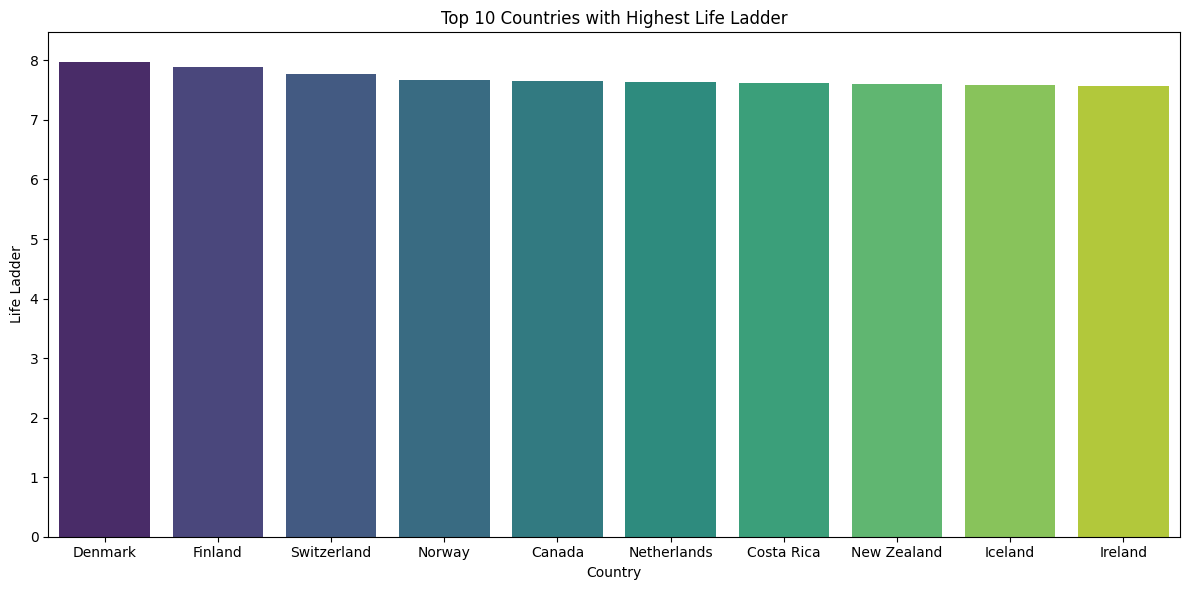

In [5]:
# FIGURE 1: Top 10 Countries with Highest Life Ladder
df_unique = df.sort_values(by=life_ladder_col, ascending=False).drop_duplicates(subset=country_col, keep='first')
top10 = df_unique.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_col, y=life_ladder_col, data=top10, palette='viridis')
plt.title('Top 10 Countries with Highest Life Ladder')
plt.xlabel('Country')
plt.ylabel(life_ladder_col)
plt.ylim(0, top10[life_ladder_col].max() + 0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\2951934085.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Happiness Category'] = pd.cut(df_unique[life_ladder_col],


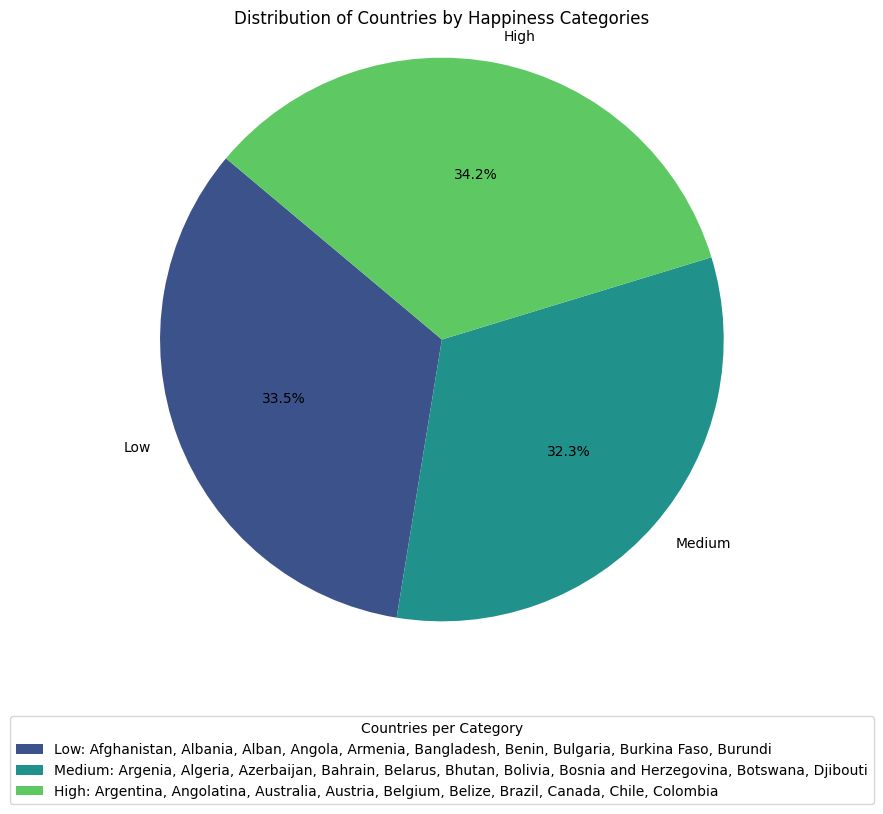

In [ ]:
# FIGURE 2: Distribution of Countries by Happiness Categories

df_unique = df.drop_duplicates(subset=country_col, keep='first')

bins = [df_unique[life_ladder_col].min(),
        df_unique[life_ladder_col].quantile(0.33),
        df_unique[life_ladder_col].quantile(0.66),
        df_unique[life_ladder_col].max()]
cat_labels = ['Low', 'Medium', 'High']
df_unique['Happiness Category'] = pd.cut(df_unique[life_ladder_col],
                                           bins=bins,
                                           labels=cat_labels,
                                           include_lowest=True)
category_counts = df_unique['Happiness Category'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(category_counts.values,
                                   labels=category_counts.index,
                                   autopct='%1.1f%%',
                                   startangle=140,
                                   colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of Countries by Happiness Categories')

legend_labels = []
for cat in cat_labels:
    countries = df_unique[df_unique['Happiness Category'] == cat][country_col].head(10).tolist()
    if countries:
        legend_labels.append(f"{cat}: {', '.join(countries)}")
plt.legend(legend_labels, title="Countries per Category", loc="upper center",
           bbox_to_anchor=(0.5, -0.1), ncol=1)
plt.axis('equal')
plt.show()

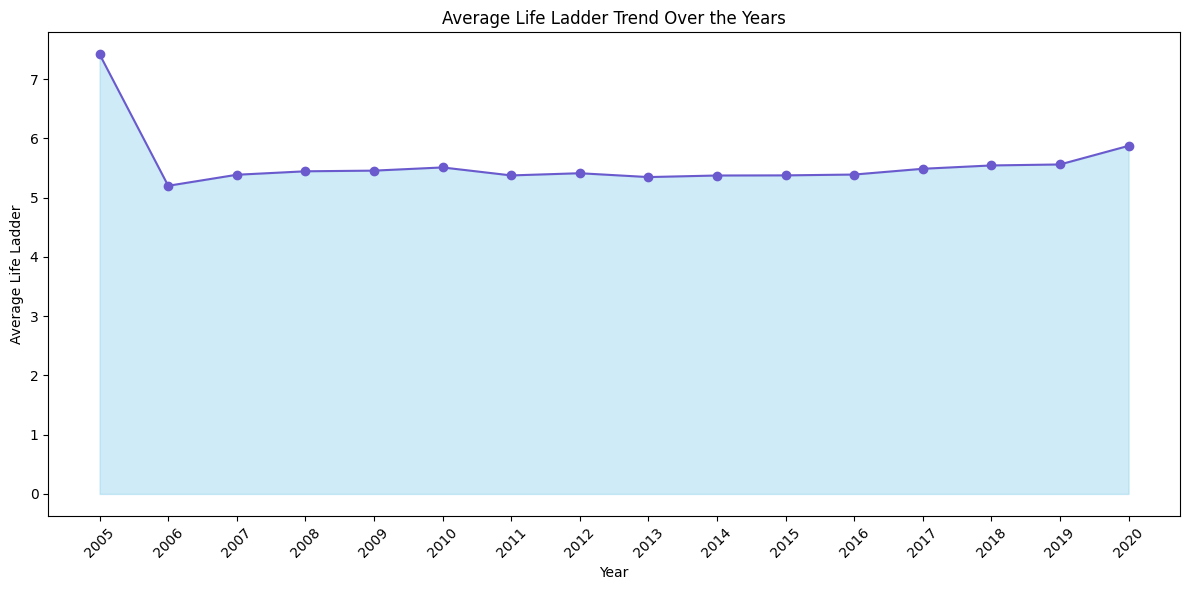

In [7]:
# FIGURE 3: Average Life Ladder Trend Over the Years

yearly_trend = df.groupby(year_col)[life_ladder_col].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.fill_between(yearly_trend[year_col],
                 yearly_trend[life_ladder_col],
                 color='skyblue', alpha=0.4)
plt.plot(yearly_trend[year_col],
         yearly_trend[life_ladder_col],
         color='Slateblue', marker='o')
plt.title('Average Life Ladder Trend Over the Years')
plt.xlabel('Year')
plt.ylabel(f'Average {life_ladder_col}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

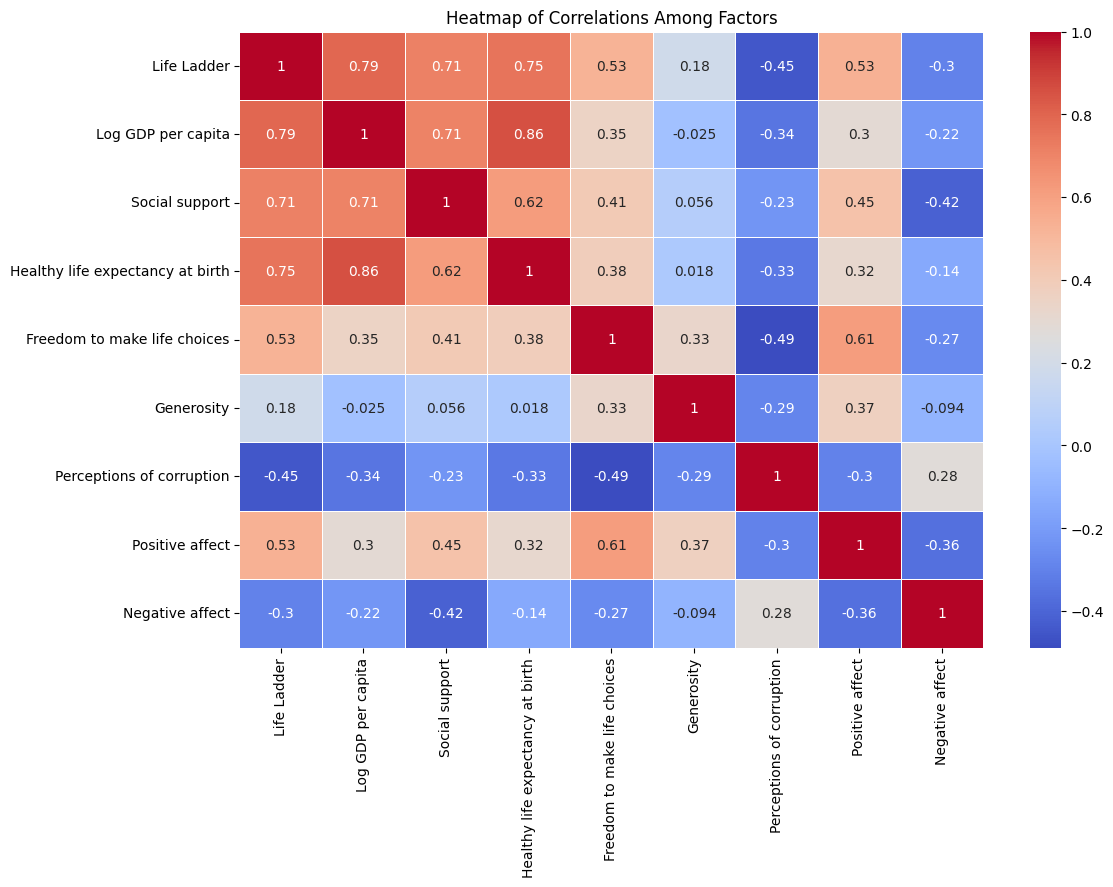

In [8]:
# FIGURE 4: Heatmap of Correlations Among Factors

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if year_col in numeric_cols:
    numeric_cols.remove(year_col)
    
plt.figure(figsize=(12, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlations Among Factors')
plt.show()

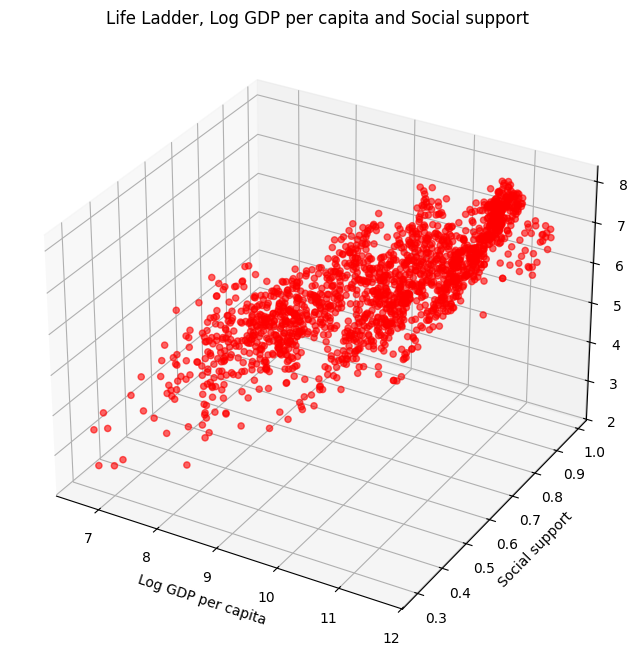

In [9]:
# FIGURE 5: 3D Scatter Plot: Log GDP, Social Support, and Life Ladder

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df[log_gdp_col], df[social_support_col], df[life_ladder_col],
           c='r', marker='o', alpha=0.6)
ax.set_xlabel(log_gdp_col)
ax.set_ylabel(social_support_col)
ax.set_zlabel(life_ladder_col)
plt.title(f'{life_ladder_col}, {log_gdp_col} and {social_support_col}')
plt.show()

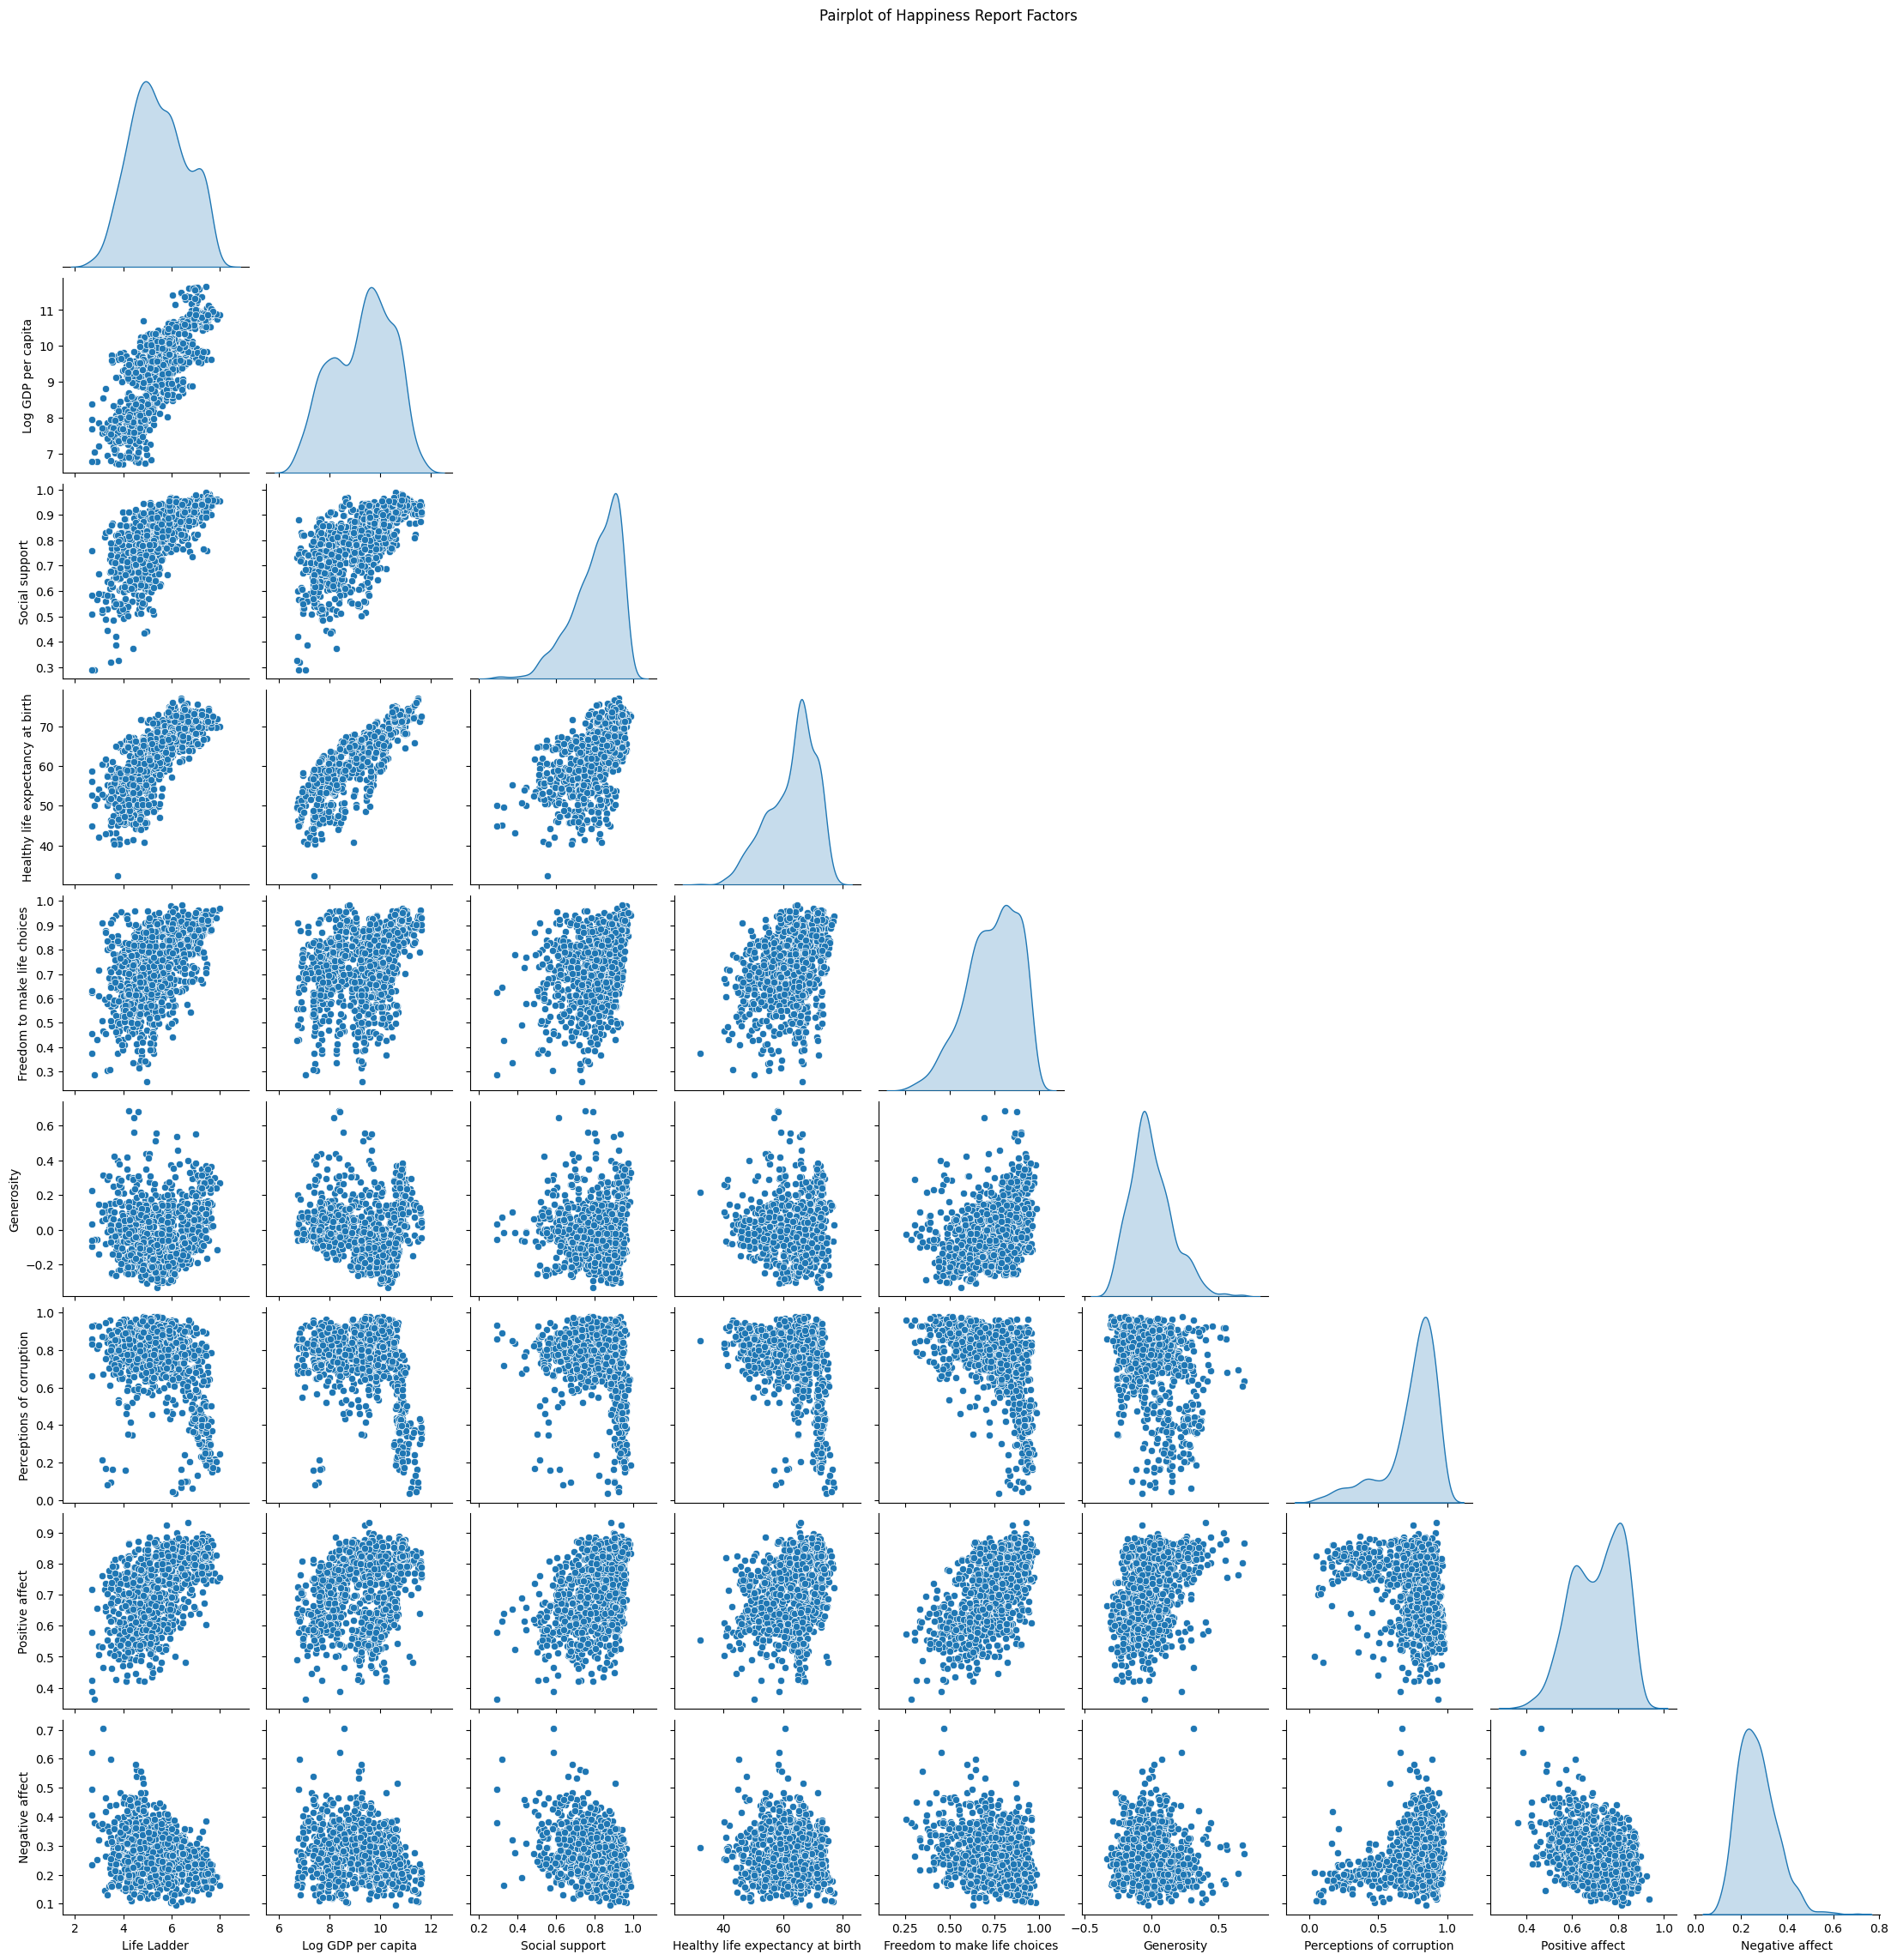

In [10]:
# FIGURE 6: Pairplot of Happiness Report Factors

selected_columns = [life_ladder_col, log_gdp_col, social_support_col,
                    healthy_life_col, freedom_col, generosity_col,
                    corruption_col, positive_affect_col, negative_affect_col]

if len(df) > 1000:
    df_pair = df[selected_columns].sample(n=1000, random_state=42)
else:
    df_pair = df[selected_columns]

sns.pairplot(df_pair, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Happiness Report Factors', y=1.02)
plt.show()

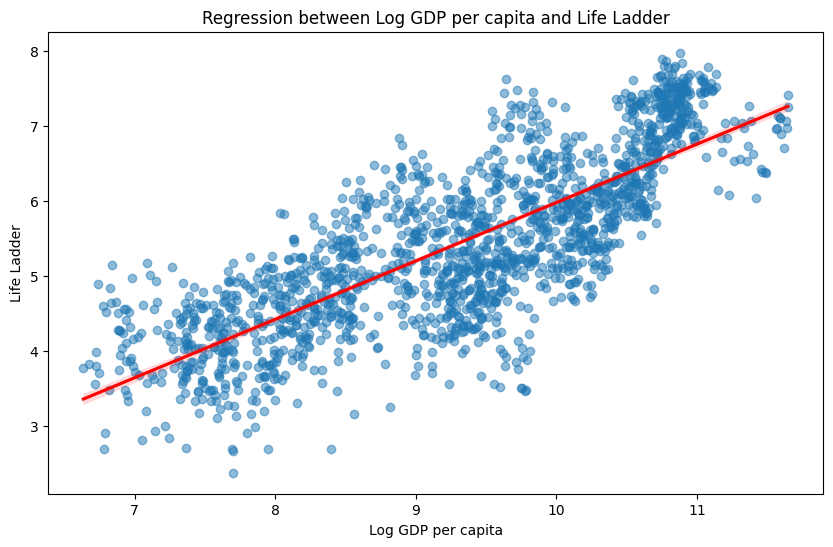

In [11]:
# FIGURE 7: Regression Plot: Life Ladder vs Log GDP per capita

plt.figure(figsize=(10, 6))
sns.regplot(x=log_gdp_col, y=life_ladder_col, data=df,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'Regression between {log_gdp_col} and {life_ladder_col}')
plt.xlabel(log_gdp_col)
plt.ylabel(life_ladder_col)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\3336020028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=year_col, y=life_ladder_col, data=df, palette='viridis')


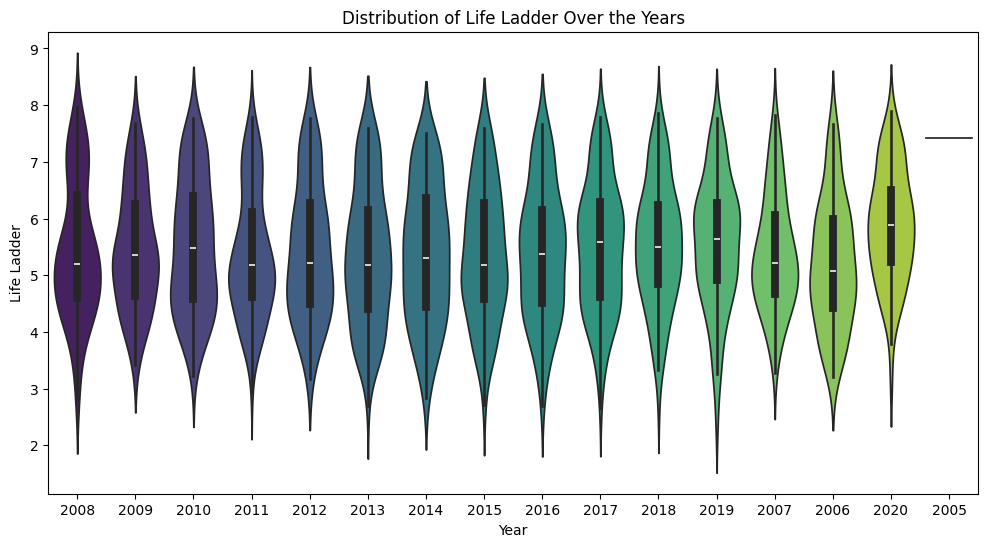

In [12]:
# FIGURE 8: Violin Plot: Distribution of Life Ladder Over the Years

plt.figure(figsize=(12, 6))
sns.violinplot(x=year_col, y=life_ladder_col, data=df, palette='viridis')
plt.title(f'Distribution of {life_ladder_col} Over the Years')
plt.xlabel('Year')
plt.ylabel(life_ladder_col)
plt.show()

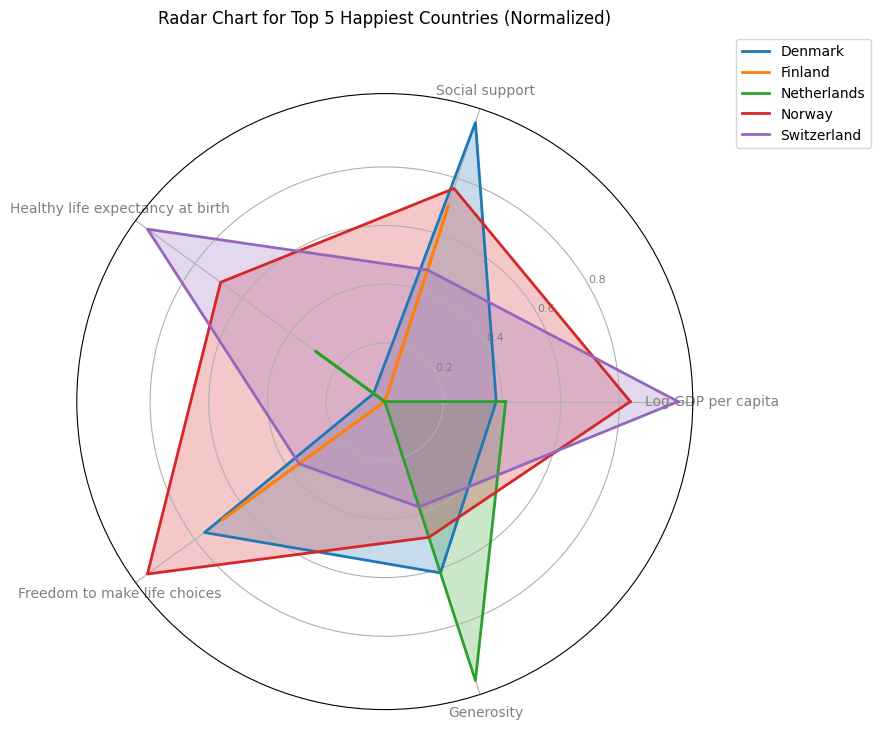

In [13]:
# FIGURE 9: Radar Chart for Top 5 Countries (Average Life Ladder)

top5_countries = df.groupby(country_col)[life_ladder_col].mean().nlargest(5).index.tolist()

metrics = [log_gdp_col, social_support_col, healthy_life_col, freedom_col, generosity_col]
data_radar = df[df[country_col].isin(top5_countries)].groupby(country_col)[metrics].mean()

scaler = MinMaxScaler()
data_radar_norm = pd.DataFrame(scaler.fit_transform(data_radar), columns=metrics, index=data_radar.index)

categories = list(data_radar_norm.columns)
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for country in data_radar_norm.index:
    values = data_radar_norm.loc[country].tolist()
    values += values[:1]  
    ax.plot(angles, values, label=country, linewidth=2)
    ax.fill(angles, values, alpha=0.25)

plt.xticks(angles[:-1], categories, color='grey', size=10)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=8)
plt.title('Radar Chart for Top 5 Happiest Countries (Normalized)', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

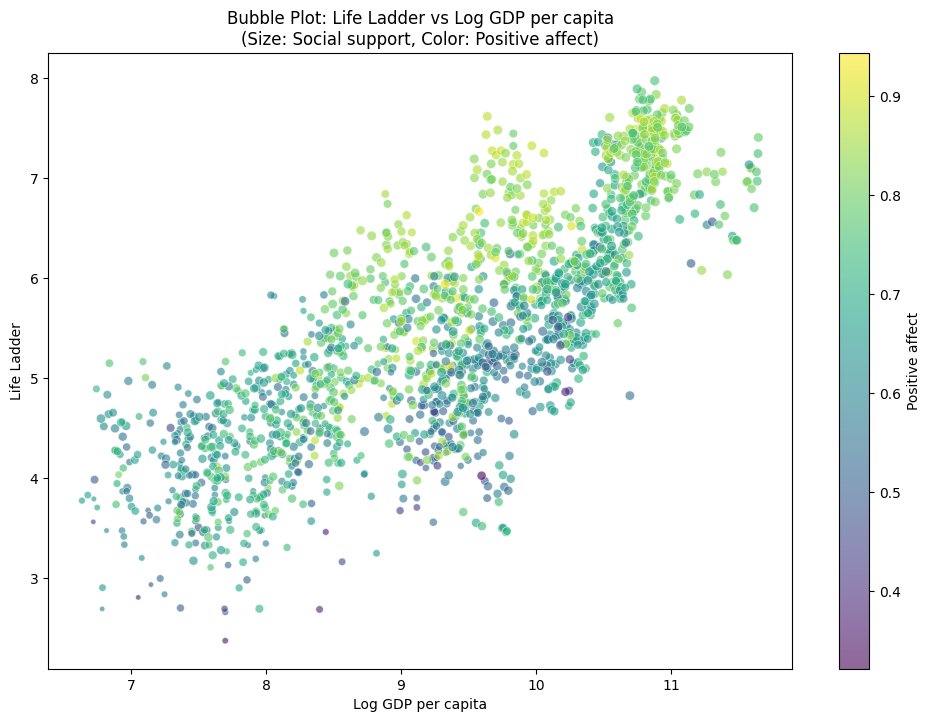

In [14]:
# FIGURE 10: Bubble Plot – Life Ladder vs Log GDP per capita

plt.figure(figsize=(12, 8))
bubble = plt.scatter(df[log_gdp_col], df[life_ladder_col],
                     s=df[social_support_col] * 50,
                     c=df[positive_affect_col],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='w',
                     linewidth=0.5)
plt.xlabel(log_gdp_col)
plt.ylabel(life_ladder_col)
plt.title(f'Bubble Plot: {life_ladder_col} vs {log_gdp_col}\n'
          f'(Size: {social_support_col}, Color: {positive_affect_col})')
cbar = plt.colorbar(bubble)
cbar.set_label(positive_affect_col)
plt.show()

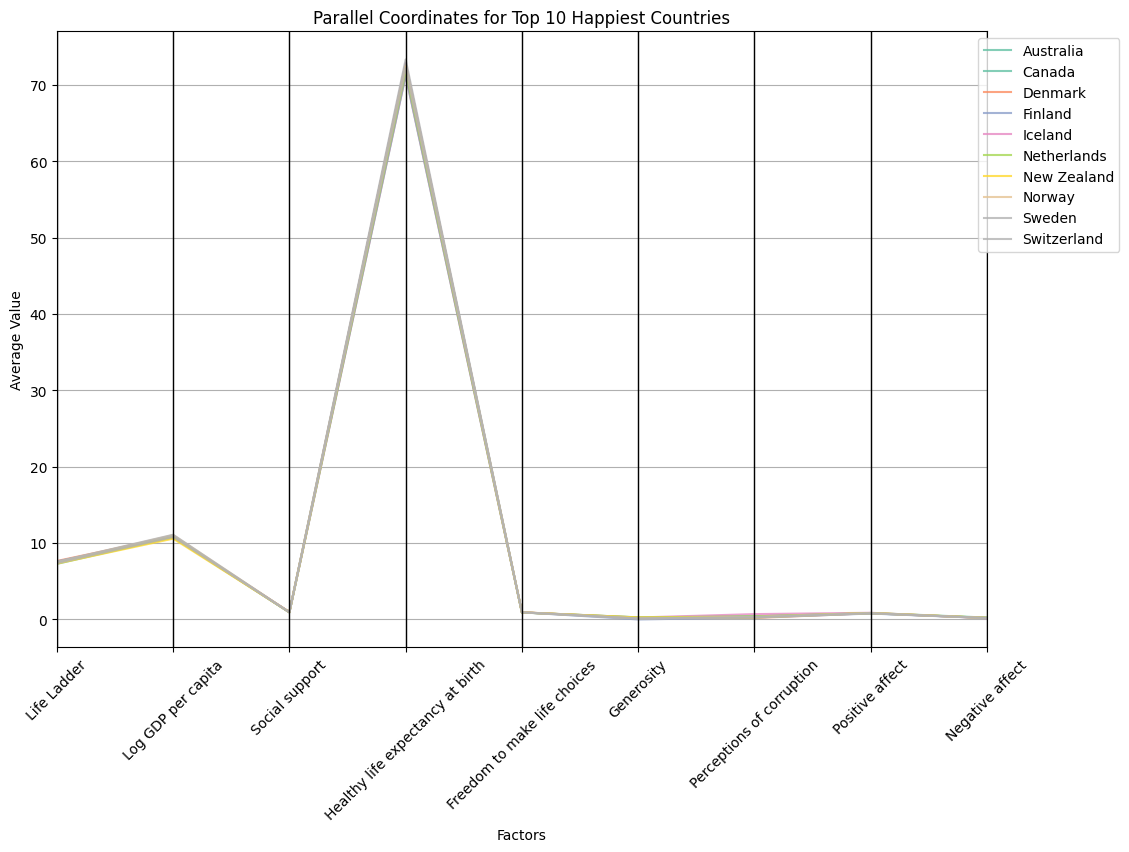

In [15]:
# FIGURE 11: Parallel Coordinates for Top 10 Countries (Average Life Ladder)

top10_countries = df.groupby(country_col)[life_ladder_col].mean().nlargest(10).index.tolist()
df_top10 = df[df[country_col].isin(top10_countries)]
metrics_all = [life_ladder_col, log_gdp_col, social_support_col, healthy_life_col,
               freedom_col, generosity_col, corruption_col, positive_affect_col, negative_affect_col]
df_top10_avg = df_top10.groupby(country_col)[metrics_all].mean().reset_index()

plt.figure(figsize=(12, 8))
parallel_coordinates(df_top10_avg, country_col, colormap=plt.get_cmap("Set2"), alpha=0.8)
plt.title('Parallel Coordinates for Top 10 Happiest Countries')
plt.xlabel('Factors')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.show()

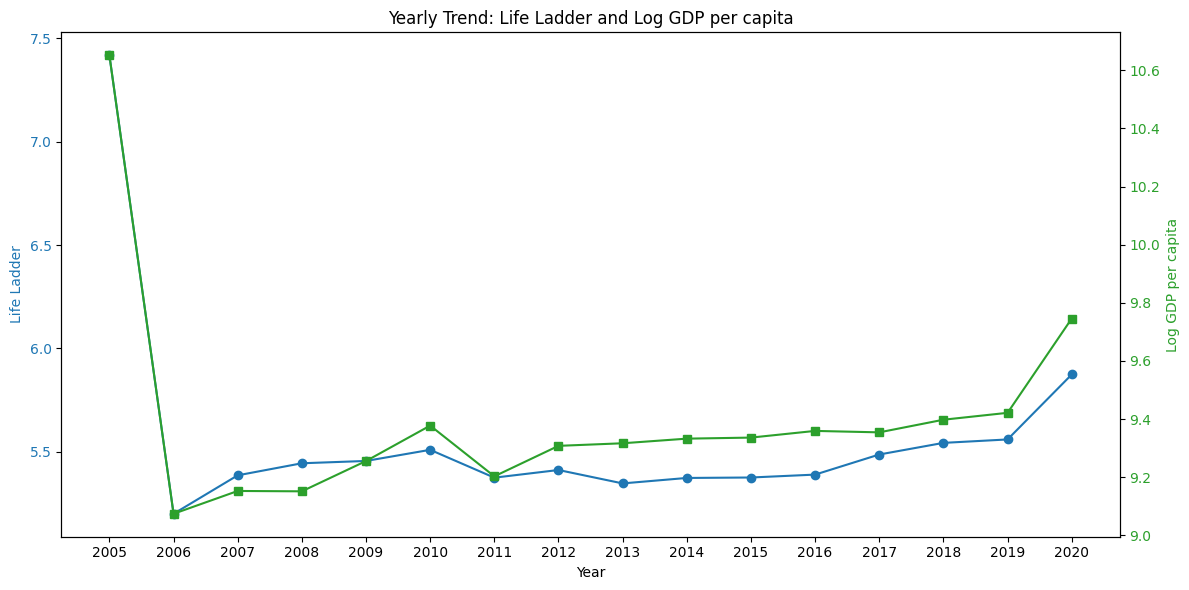

In [16]:
# FIGURE 12: Dual-Axis Plot for Yearly Average Life Ladder and Log GDP per capita

yearly_stats = df.groupby(year_col).agg({life_ladder_col: 'mean', log_gdp_col: 'mean'}).reset_index()
fig, ax1 = plt.subplots(figsize=(12, 6))
color1 = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel(life_ladder_col, color=color1)
ax1.plot(yearly_stats[year_col], yearly_stats[life_ladder_col],
         marker='o', color=color1, label=life_ladder_col)
ax1.tick_params(axis='y', labelcolor=color1)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel(log_gdp_col, color=color2)
ax2.plot(yearly_stats[year_col], yearly_stats[log_gdp_col],
         marker='s', color=color2, label=log_gdp_col)
ax2.tick_params(axis='y', labelcolor=color2)
plt.title(f'Yearly Trend: {life_ladder_col} and {log_gdp_col}')
fig.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14180\1250405637.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='GDP Bin', y=life_ladder_col, data=df,


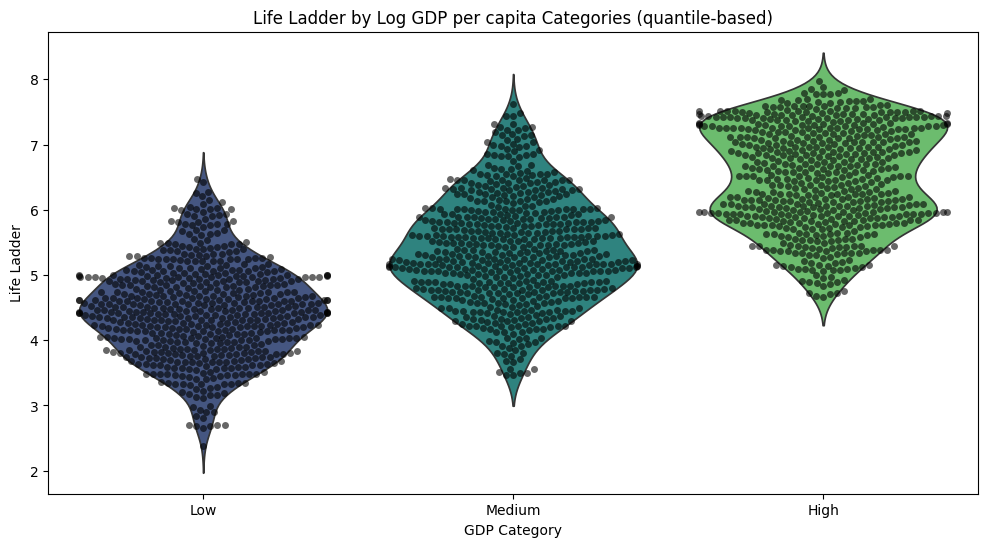

In [17]:
# FIGURE 13: Swarm + Violin Plot – Life Ladder by GDP Bins

df['GDP Bin'] = pd.qcut(df[log_gdp_col], q=3, labels=['Low', 'Medium', 'High'])
plt.figure(figsize=(12, 6))
sns.violinplot(x='GDP Bin', y=life_ladder_col, data=df,
               palette='viridis', inner=None)
sns.swarmplot(x='GDP Bin', y=life_ladder_col, data=df,
              color='k', alpha=0.6)
plt.title(f'{life_ladder_col} by {log_gdp_col} Categories (quantile-based)')
plt.xlabel('GDP Category')
plt.ylabel(life_ladder_col)
plt.show()

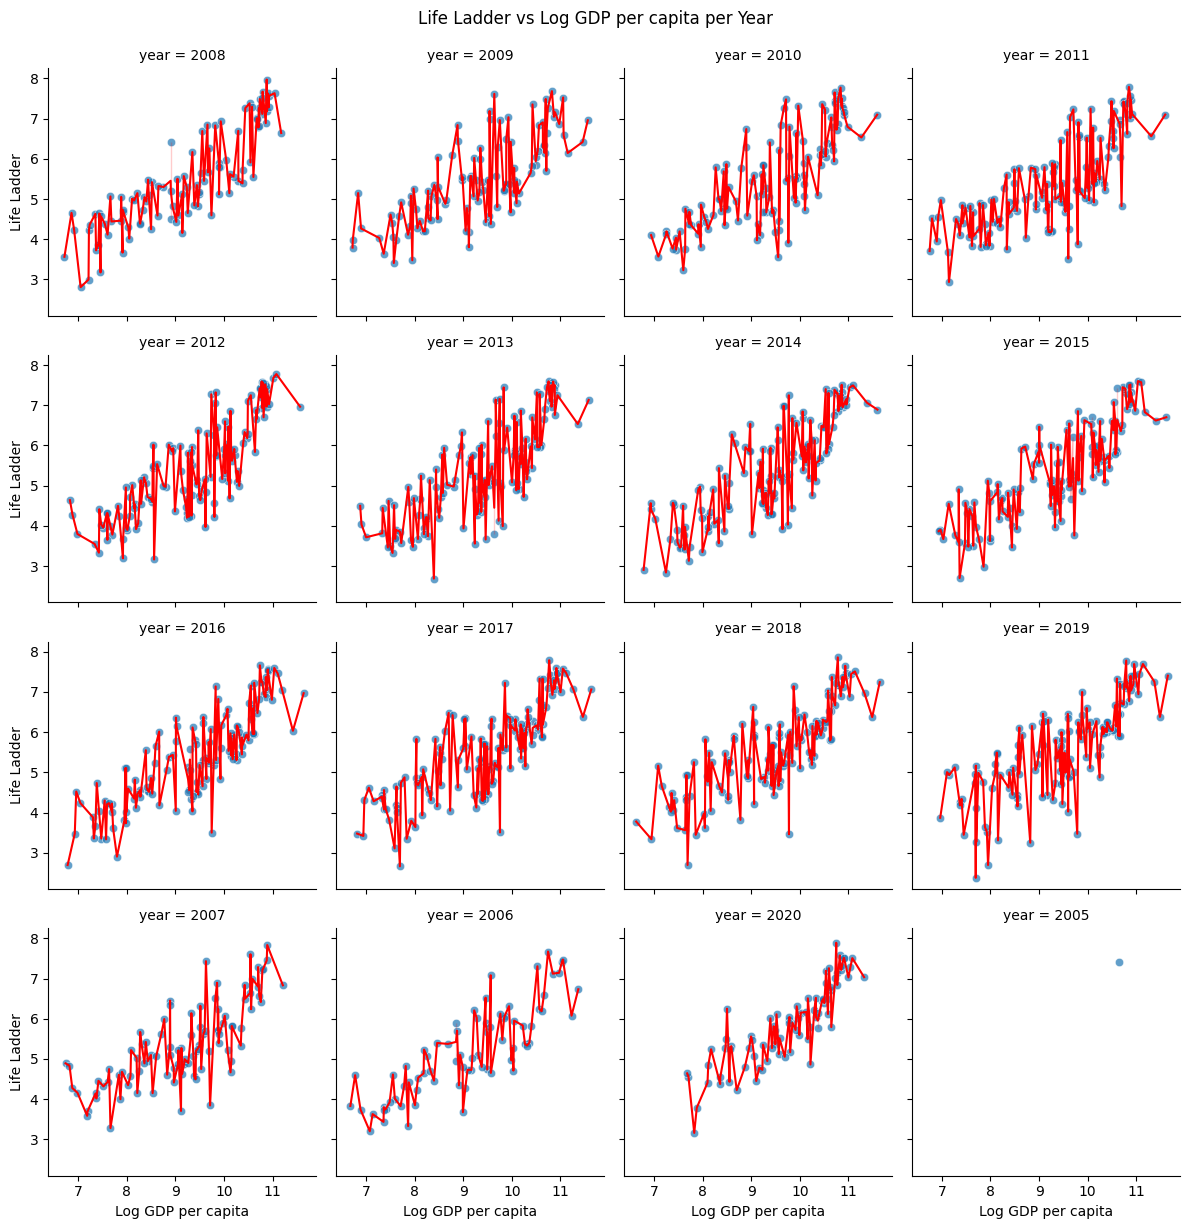

In [ ]:
# FIGURE 14: FacetGrid – Scatter Plot for Life Ladder vs Log GDP per capita per Year

g = sns.FacetGrid(df, col=year_col, col_wrap=4, height=3, palette='viridis')
g.map_dataframe(sns.scatterplot, x=log_gdp_col, y=life_ladder_col, alpha=0.7)
g.map_dataframe(sns.lineplot, x=log_gdp_col, y=life_ladder_col, estimator='mean', color='red')
g.set_axis_labels(log_gdp_col, life_ladder_col)
g.fig.suptitle(f'{life_ladder_col} vs {log_gdp_col} per Year', y=1.02)
plt.show()